# Train Data

In [11]:
from src.models.train_model import *
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

## Test with Ordinal Encoding Data

### Load data

In [3]:
file_path = './data/processed/1_1_processed_ordinal_encoding.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ./data/processed/1_1_processed_ordinal_encoding.csv


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [2]:
params = None
try:
    with open('best_params_xgbost.json') as fp:
        params = json.load(fp)
        pp.pprint(params)
except:
    params = {}

model = Regressor(**params)

Using XGBoost as backend


In [5]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
100%|██████████| 100/100 [11:52<00:00,  7.12s/it, best loss: 622583527674.1735]
Using XGBoost as backend


In [6]:
print(f'Training model')
model.train(x_train, y_train)

Training model


In [7]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

Predicting test samples


In [8]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

Prediction Finished. RMSE:
595581.911885373


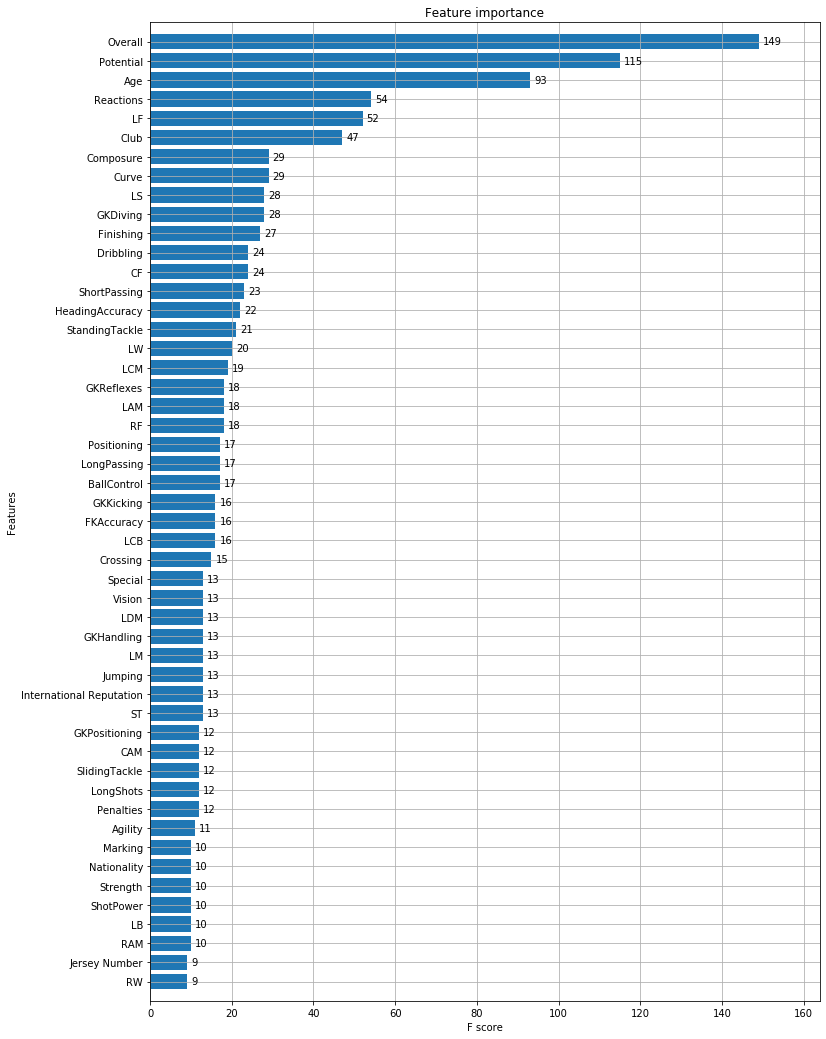

In [9]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Test with OneHotEncoding Data

### Load Data

In [13]:
file_path = './data/processed/1_1_processed_onehot_encoding.csv'
print(f'Loading file from {file_path}')

df = pd.read_csv(file_path)
x = df.drop(['Value', 'Wage'], axis=1)
y = df['Value']

Loading file from ./data/processed/1_1_processed_onehot_encoding.csv


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Train Regressor with XGBoost backend

In [15]:
params = None
try:
    with open('best_params_xgbost.json') as fp:
        params = json.load(fp)
        pp.pprint(params)
except:
    params = {}

model = Regressor(**params)

Using XGBoost as backend


In [16]:
print('Tuning HyperParameters')
model.tune_hyper_parameters(x_train, y_train)

Tuning HyperParameters
 15%|█▌        | 15/100 [29:47<2:48:50, 119.18s/it, best loss: 1498997609576.7676]


KeyboardInterrupt: 

In [0]:
print(f'Training model')
model.train(x_train, y_train)

In [0]:
print('Predicting test samples')
predictions: pd.DataFrame = model.predict(x_test)

In [0]:
print('Prediction Finished. RMSE:')
print(mean_squared_error(y_test, predictions, squared=False))

In [0]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model._model, max_num_features=50, height=0.8, ax=ax)
plt.show()